In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/SERSTRUT/features/preprocessing'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/SERSTRUT/features/preprocessing


In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
import numpy as np
import copy
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [3]:
source= pd.read_csv("final_H358.csv")
target= pd.read_csv("final_H355.csv")

Preprocessing

In [4]:
#3 classes (0,1,2)
source.loc[source[source.labels.isin([ 3.0,4.0])].index, 'labels']=2.0
target.loc[target[target.labels.isin([ 3.0,4.0])].index, 'labels']=2.0

#Source preprocessing
ys = source.labels
Xs = source.drop(['Time', 'labels'], axis =1)


#Target preprocessing
yt = target.labels
Xt= target.drop(['Time', 'labels'], axis =1)


X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs, ys, test_size=0.25, stratify=ys, random_state = 42)

#Split Target Dataset
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.85, stratify=yt, random_state = 42)
MAX = 3
target_names = ['Class 0', 'Class 1', 'Class 2']

In [5]:
Xs.columns

Index(['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact',
       'Window_Contact'],
      dtype='object')

Decision Tree

source training accuracy: 0.924074074074074
source test accuracy: 0.9138888888888889
Confusion Matrix Target:
[[250   9   2]
 [  1  36   7]
 [  0  12  43]]


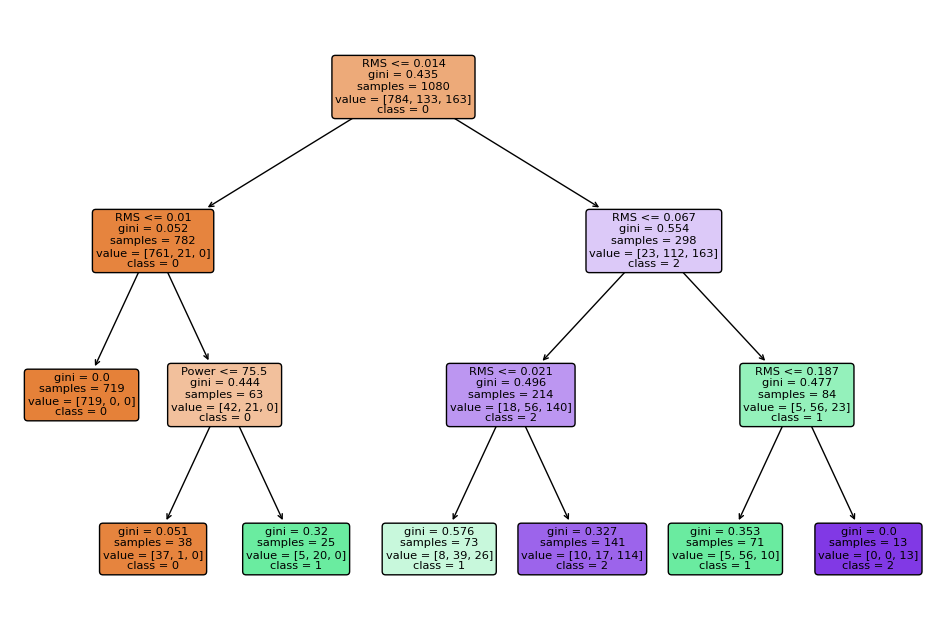

In [6]:
clf_s = DecisionTreeClassifier(max_depth=3)
clf_s = clf_s.fit(X_train_s, y_train_s)
print('source training accuracy:', clf_s.score(X_train_s, y_train_s))
print('source test accuracy:', clf_s.score(X_test_s, y_test_s))
y_pred = clf_s.predict(X_test_s)
cm = confusion_matrix(y_test_s, y_pred)
print("Confusion Matrix Target:")
print(cm)

plt.figure(figsize=(12, 8))
plot_tree(clf_s, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1','2'], filled=True, rounded=True)
plt.show()

Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_s, y_train_s)
print('source test accuracy:', clf.score(X_test_s, y_test_s))
y_pred = clf.predict(X_test_s)
cm = confusion_matrix(y_test_s, y_pred)
print("Confusion Matrix Target:")
print(cm)


source test accuracy: 0.9611111111111111
Confusion Matrix Target:
[[254   5   2]
 [  0  40   4]
 [  0   3  52]]


Target

source training accuracy: 0.95625
source test accuracy: 0.8678414096916299
Confusion Matrix Target:
[[621  34   1]
 [ 33 108  22]
 [  5  25  59]]


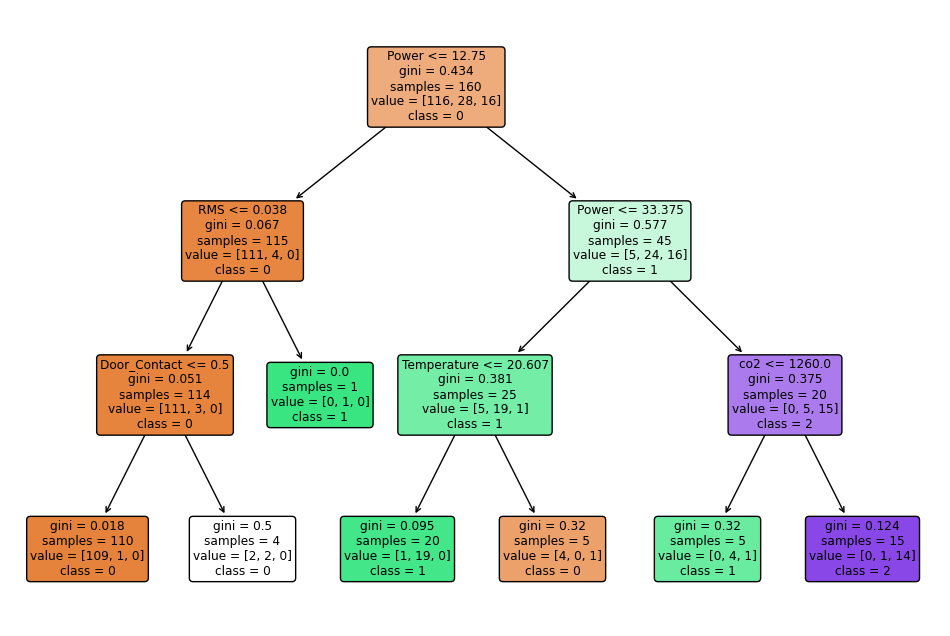

In [8]:
dtree_t = DecisionTreeClassifier(max_depth=3)
dtree_t = dtree_t.fit(X_train_t, y_train_t)
print('source training accuracy:', dtree_t.score(X_train_t, y_train_t))
print('source test accuracy:', dtree_t.score(X_test_t, y_test_t))
y_pred = dtree_t.predict(X_test_t)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix Target:")
print(cm)
plt.figure(figsize=(12, 8))
plot_tree(dtree_t, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact','Window_Contact'], class_names=['0','1','2'], filled=True, rounded=True)
plt.show()

In [9]:
clf = RandomForestClassifier()
clf.fit(X_train_t, y_train_t)
print('source test accuracy:', clf.score(X_test_t, y_test_t))
y_pred = clf.predict(X_test_t)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix Target:")
print(cm)


source test accuracy: 0.8942731277533039
Confusion Matrix Target:
[[633  23   0]
 [ 31 114  18]
 [  7  17  65]]


Simple TL

source test accuracy: 0.8469162995594713
Confusion Matrix Target:
[[615  40   1]
 [ 31  92  40]
 [  4  23  62]]


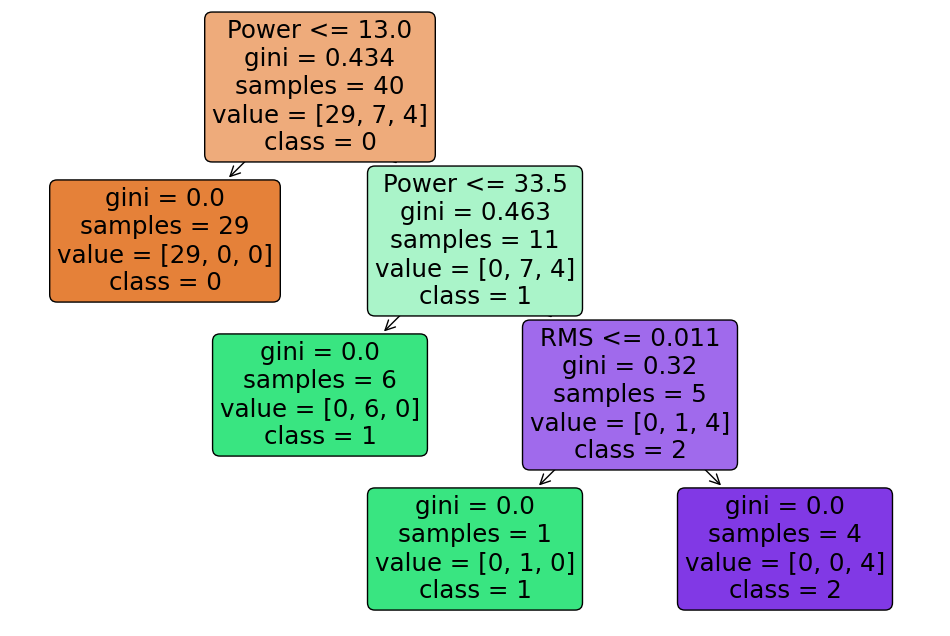

In [10]:
X_train_target, X_test_target, y_train_target, y_test_target = train_test_split(X_train_t, y_train_t, test_size=0.75, stratify=y_train_t, random_state = 42)
dtree_source= copy.deepcopy(clf_s)
dtree_source.fit(X_train_target,y_train_target)
print('source test accuracy:', dtree_source.score(X_test_t, y_test_t))
y_pred = dtree_source.predict(X_test_t)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix Target:")
print(cm)
plt.figure(figsize=(12, 8))
plot_tree(dtree_source, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact','Window_Contact'], class_names=['0','1','2'], filled=True, rounded=True)
plt.show()